1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [3]:
n = 1000

x1 = np.random.normal(loc=0.0, scale=1.0, size=n)
x2 = x1 + np.random.normal(loc=0.0, scale=3.0, size=n)
x3 = 2 * x1 + x2

X = np.vstack((x1, x2, x3))
cov = np.cov(X)
print("Covariance matrix:\n", cov, '\n')

# find eigenvectors and eigenvalues
l, V = la.eig(cov)
# take only the real component, if possible
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

# SVD decomposition
U, S, Vt = np.linalg.svd(X)

# Rescale the S to get eigenvalues
l_svd = S**2/(n-1)
V_svd = U

print("Eigenvalues SVD:\n", l_svd, '\n')
print("Eigenvectors SVD:\n", V_svd, '\n')

Covariance matrix:
 [[ 1.05391031  1.07768806  3.18550868]
 [ 1.07768806  9.91384848 12.06922461]
 [ 3.18550868 12.06922461 18.44024197]] 

Eigenvalues:
 [ 2.73723173e+01 -2.84839651e-15  2.03568345e+00] 

Eigenvectors:
 [[-0.12171477 -0.81649658  0.56437474]
 [-0.56950031 -0.40824829 -0.71344428]
 [-0.81292984  0.40824829  0.41530521]] 

Eigenvalues SVD:
 [2.74026621e+01 2.03614868e+00 1.12858540e-31] 

Eigenvectors SVD:
 [[-0.12179841  0.5643567  -0.81649658]
 [-0.56939456 -0.71352867 -0.40824829]
 [-0.81299138  0.41518472  0.40824829]] 



In [4]:
Lambda = np.diag(l)
trace = Lambda.trace()

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/trace))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1,1]/trace))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2,2]/trace))
print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % ((Lambda[2,2] + Lambda[0,0])/trace))

By selecting the component 0, we retain 0.93% of the total variability
By selecting the component 1, we retain -0.00% of the total variability
By selecting the component 2, we retain 0.07% of the total variability
By selecting the component 0 and 2, we retain 1.00% of the total variability


Text(0, 0.5, 'x3')

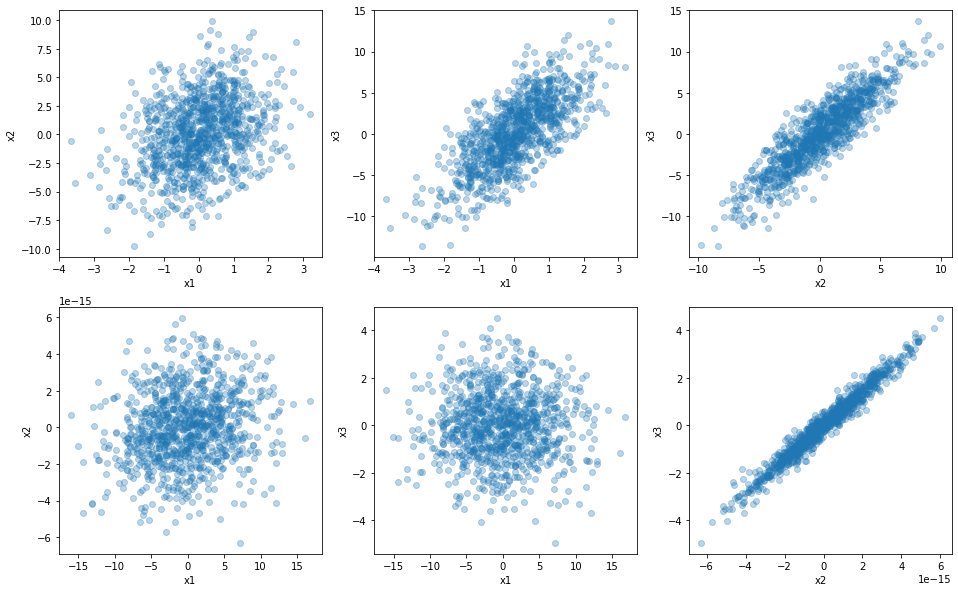

In [5]:
Xp = np.dot(V.T, X)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

axs[0, 0].scatter(X[0, :], X[1, :], alpha=0.3)
axs[0, 0].set_xlabel("x1")
axs[0, 0].set_ylabel("x2")

axs[0, 1].scatter(X[0, :], X[2, :], alpha=0.3)
axs[0, 1].set_xlabel("x1")
axs[0, 1].set_ylabel("x3")

axs[0, 2].scatter(X[1, :], X[2, :], alpha=0.3)
axs[0, 2].set_xlabel("x2")
axs[0, 2].set_ylabel("x3")

axs[1, 0].scatter(Xp[0, :], Xp[1, :], alpha=0.3)
axs[1, 0].set_xlabel("x1")
axs[1, 0].set_ylabel("x2")

axs[1, 1].scatter(Xp[0, :], Xp[2, :], alpha=0.3)
axs[1, 1].set_xlabel("x1")
axs[1, 1].set_ylabel("x3")

axs[1, 2].scatter(Xp[1, :], Xp[2, :], alpha=0.3)
axs[1, 2].set_xlabel("x2")
axs[1, 2].set_ylabel("x3")

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [7]:
noise = np.random.normal(loc=0, scale=1/20, size=(3, n, 10))
noise_sum = np.sum(noise, axis = 2)

Xn = X + noise_sum
cov = np.cov(Xn)
l, V = la.eig(cov)
l = np.real_if_close(l)

Lambda = np.diag(l)
trace = Lambda.trace()

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/trace))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1,1]/trace))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2,2]/trace))
print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % ((Lambda[2,2] + Lambda[0,0])/trace))

By selecting the component 0, we retain 0.93% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 0.07% of the total variability
By selecting the component 0 and 2, we retain 1.00% of the total variability


Text(0, 0.5, 'x3')

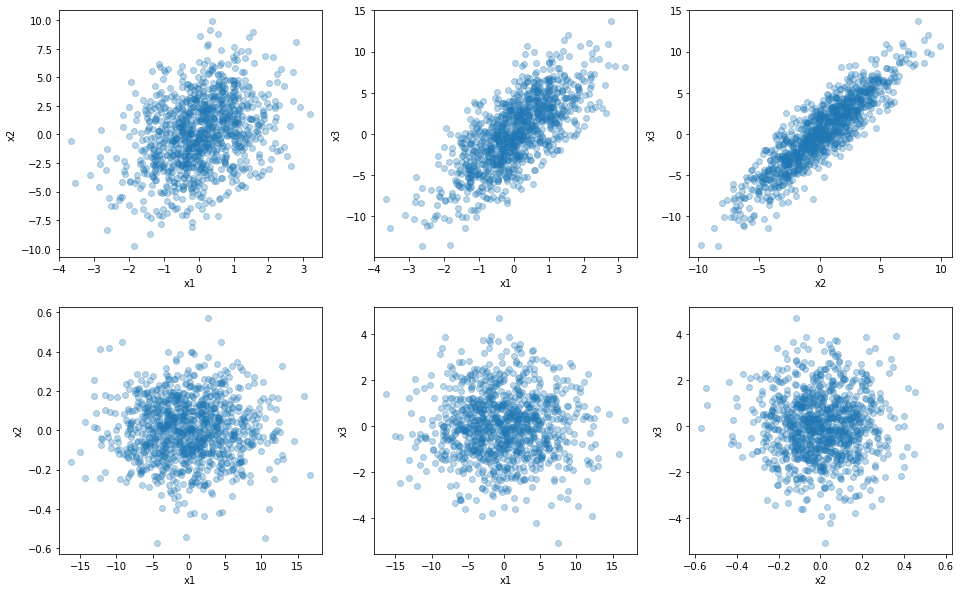

In [8]:
Xpn = np.dot(V.T, Xn)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axs[0, 0].scatter(X[0, :], X[1, :], alpha=0.3)
axs[0, 0].set_xlabel("x1")
axs[0, 0].set_ylabel("x2")

axs[0, 1].scatter(X[0, :], X[2, :], alpha=0.3)
axs[0, 1].set_xlabel("x1")
axs[0, 1].set_ylabel("x3")

axs[0, 2].scatter(X[1, :], X[2, :], alpha=0.3)
axs[0, 2].set_xlabel("x2")
axs[0, 2].set_ylabel("x3")

axs[1, 0].scatter(Xpn[0, :], Xpn[1, :], alpha=0.3)
axs[1, 0].set_xlabel("x1")
axs[1, 0].set_ylabel("x2")

axs[1, 1].scatter(Xpn[0, :], Xpn[2, :], alpha=0.3)
axs[1, 1].set_xlabel("x1")
axs[1, 1].set_ylabel("x3")

axs[1, 2].scatter(Xpn[1, :], Xpn[2, :], alpha=0.3)
axs[1, 2].set_xlabel("x2")
axs[1, 2].set_ylabel("x3")

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [9]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-01-21 21:43:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data.1’

magic04.data.1      100%[===================>]   1,41M   764KB/s    in 1,9s    

2022-01-21 21:43:38 (764 KB/s) - ‘data/magic04.data.1’ saved [1477391/1477391]

--2022-01-21 21:43:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names.1’

magic04.names.1     100%[===================>]   5,27K  

In [10]:
import pandas as pd
file_name = "data/magic04.data"
data = pd.read_csv(file_name, nrows=1000, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])
print(data)
del data['category']
covMatrix = np.cov(data.T)
l, V = la.eig(covMatrix)
l = np.sort(l)[::-1] 
l = np.real_if_close(l)
Lambda = np.diag(l)
print("By selecting the first component , we retain %.2f%% of the total variability" % (100*Lambda[0,0]/Lambda.trace()))
treshold=0.9
info=0
ind=0
while info<treshold:
    info+=Lambda[ind,ind]/Lambda.trace()
    ind+=1
print("By selecting the first %d component , we retain %.2f%% of the total variability" % (ind,100*info))

      fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0     28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
..        ...       ...     ...     ...     ...       ...      ...       ...   
995   20.0489    9.2926  2.4014  0.6429  0.4226    4.1464 -14.5626   10.2506   
996   13.3396   10.5628  2.1917  0.7910  0.4019  -14.8910  -2.3901   11.9001   
997   49.8521   11.4525  2.3971  0.4529  0.2305   52.6071  39.3622   -8.6905   
998   29.2688   14.2779  2.5723  0.4016  0.2021  -21.2132 -23.9344   -8.2073   
999   21.9470   20.3281  2.4864  0.4078  0.2072   12.8338  10.4007   14.8348   

      fAlpha     fDist category  
0    